In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import scipy.constants
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#

import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
os.environ['PROJ_LIB'] = '{}/anaconda3/share/proj'.format(os.getenv('HOME'))
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#

#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep

#import global_etas_auto as ggep

from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

In [24]:
# let's just get a catalog and pull an earthquake out of it.
n_cpu=None
#
lat0 = 35.705
lon0 = -117.506
#
#ll_sacramento = (lon0, lat0)

#m0 = 7.8

d_lat=2.
d_lon=2.
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#
to_dt = dtm.datetime(2019,7,6, tzinfo=tzutc)
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, 0, tzinfo=tzutc),
               't_now':to_dt, 't_future':None ,
               'lats': lats, 'p_cat': 1.1, 'b1': 1.0, 'mc': 2.5, 'q_cat': 1.5,
               'p_etas':1.1, 'q_etas':1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':1.5,
            'etas_range_factor':30.0, 'ab_ratio_expon':.25 }
eq_prams['mc'] = 6.7
eq_prams['t0'] = dtm.datetime(2019,6,20, 0,0,0,0, tzinfo=pytz.timezone('UTC'))
#

mycat = atp.cat_from_anss_comcat(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=pytz.timezone('UTC')), 
                                dtm.datetime.now(pytz.timezone('UTC'))],
                            Nmax=None, fout=None, rec_array=True)
#                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)

mycat = gep.make_ETAS_catalog_mpp(incat=mycat, n_cpu=n_cpu)
#

*** DEBUG:   https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2005-01-01%2000:00:00&endtime=2019-11-13%2020:38:04&minmagnitude=2.5&minlatitude=33.705&maxlatitude=37.705&minlongitude=-119.506&maxlongitude=-115.506&eventtype=earthquake&orderby=time
etas_prams:  {'incat': None, 'lats': [32.0, 38.0], 'lons': [-117.0, -114.0], 'mc': 2.5, 'date_range': ['1990-1-1', None], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.5, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
results fetched.


In [25]:
for rw in mycat:
    if rw['mag']>7.0:
        eq_ms = rw
    #
#
print('mainshock: ', eq_ms)

mainshock:  ('2019-07-06T03:19:53.040000', 35.7695, -117.5993333, 7.1, 8., 737246.13880833, 61.65950019, 1277.03847158, 1.40581446e-05, 18.62087137, 165.68091867, 0.00150686, 1., 1.1, 1.5, 26.80175629, [0.08861158, 0.05480372], [[ 0.82182979,  0.56973309], [-0.56973309,  0.82182979]], 3366.)


In [26]:
eq = gep.Earthquake(eq_ms)

In [27]:
print(eq.local_intensity(lon=-117., lat=35.) )
print(eq.local_intensity(lon=-117., lat=34.) )

7.164587062993351e-13
5.823912189249373e-13


In [28]:
eq.t_0, eq.t_1, eq.t_2

(165.68091866556017, 737376.8599115594, None)

In [29]:
ts = numpy.linspace(eq.t_1, eq.t_1+100, 100)

#ts[20] = None

In [30]:
#orates = eq.omori_rate(t=ts)
# this works, but eq.orate() does not; eq.orate() fails on some sort of validation (.any(), .all() reference)
orates = 1./(eq.tau*(eq.t_0 + ts))

print('** orates: ', orates)

** orates:  [0.00089979 0.00089979 0.00089979 0.00089978 0.00089978 0.00089978
 0.00089978 0.00089978 0.00089978 0.00089978 0.00089978 0.00089977
 0.00089977 0.00089977 0.00089977 0.00089977 0.00089977 0.00089977
 0.00089977 0.00089976 0.00089976 0.00089976 0.00089976 0.00089976
 0.00089976 0.00089976 0.00089976 0.00089975 0.00089975 0.00089975
 0.00089975 0.00089975 0.00089975 0.00089975 0.00089975 0.00089974
 0.00089974 0.00089974 0.00089974 0.00089974 0.00089974 0.00089974
 0.00089974 0.00089973 0.00089973 0.00089973 0.00089973 0.00089973
 0.00089973 0.00089973 0.00089973 0.00089973 0.00089972 0.00089972
 0.00089972 0.00089972 0.00089972 0.00089972 0.00089972 0.00089972
 0.00089971 0.00089971 0.00089971 0.00089971 0.00089971 0.00089971
 0.00089971 0.00089971 0.0008997  0.0008997  0.0008997  0.0008997
 0.0008997  0.0008997  0.0008997  0.0008997  0.00089969 0.00089969
 0.00089969 0.00089969 0.00089969 0.00089969 0.00089969 0.00089969
 0.00089968 0.00089968 0.00089968 0.00089968 0.0008

In [31]:
print('** orates: ', orates)

** orates:  [0.00089979 0.00089979 0.00089979 0.00089978 0.00089978 0.00089978
 0.00089978 0.00089978 0.00089978 0.00089978 0.00089978 0.00089977
 0.00089977 0.00089977 0.00089977 0.00089977 0.00089977 0.00089977
 0.00089977 0.00089976 0.00089976 0.00089976 0.00089976 0.00089976
 0.00089976 0.00089976 0.00089976 0.00089975 0.00089975 0.00089975
 0.00089975 0.00089975 0.00089975 0.00089975 0.00089975 0.00089974
 0.00089974 0.00089974 0.00089974 0.00089974 0.00089974 0.00089974
 0.00089974 0.00089973 0.00089973 0.00089973 0.00089973 0.00089973
 0.00089973 0.00089973 0.00089973 0.00089973 0.00089972 0.00089972
 0.00089972 0.00089972 0.00089972 0.00089972 0.00089972 0.00089972
 0.00089971 0.00089971 0.00089971 0.00089971 0.00089971 0.00089971
 0.00089971 0.00089971 0.0008997  0.0008997  0.0008997  0.0008997
 0.0008997  0.0008997  0.0008997  0.0008997  0.00089969 0.00089969
 0.00089969 0.00089969 0.00089969 0.00089969 0.00089969 0.00089969
 0.00089968 0.00089968 0.00089968 0.00089968 0.0008

In [32]:
print(numpy.round(1.23456789,4))

1.2346


li_shape[0]: (10, 5, 5)
li_shape[1]: (10, 25)
li_shape[2]: (10, 25)
(itr==mgr).all() False
******


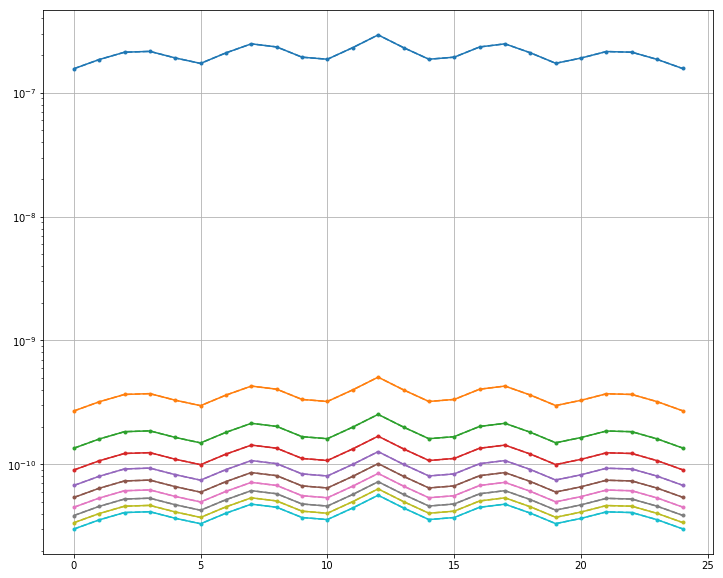

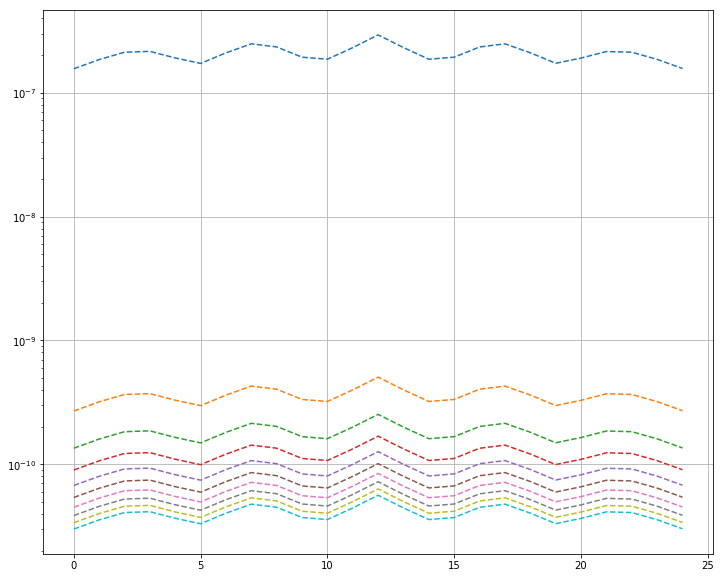

In [77]:
# create three versions of lons, lats:
# 1) itertools
# 2) meshgrid
# 3) meshgrid, then raveled to look like itertools
#
lon_dim = numpy.linspace(eq.lon-2., eq.lon+2., 5)
lat_dim  = numpy.linspace(eq.lat-2., eq.lat+2., 5)
#
# note: we might want to transpose these. meshgrid() and itertools.product() basically 
#. create transposed versinos of the same data product.
#
lons_mg, lats_mg = numpy.meshgrid(lon_dim, lat_dim)
LL_i = numpy.array([[b,a] for a,b in itertools.product(lat_dim, lon_dim)])
LL_r = numpy.array([lons_mg.ravel(), lats_mg.ravel()]).T

#
# NOTE: I think this is the right way to compare 2D and ravel()ed data.
# TODO: figure these out...
local_intensities_mgs = eq.local_intensities(ts=ts, lons=lons_mg, lats=lats_mg)
local_intensities_mgr = eq.local_intensities(ts=ts, lons=lons_mg.T.reshape(-1), lats=lats_mg.T.reshape(-1))
# this might all be wrong (axes not alligned correctly) now...
local_intensities_itr = eq.local_intensities(ts=ts, lons=LL_i[:,0], lats=LL_i[:,1])

for k, li in enumerate([local_intensities_mgs, local_intensities_mgr, local_intensities_itr]):
    print('li_shape[{}]: {}'.format(k, li.shape))
#print('li_shapes: ', local_intensities.shape)
#print('** ', local_intensities[0][0:20])
#
#print('mgs==mgr: ', local_intensities_mgs.reshape(local_intensities_mgr.shape)==local_intensities_mgr)
#print('mgs==itr: ',  (local_intensities_mgs==local_intensities_itr.reshape(-1, 5,5)))
#
# these basically are equal, with a nan issue in the middle.
#print('itr==mgr: ', (local_intensities_itr==local_intensities_mgr))
print('(itr==mgr).all()', (local_intensities_itr==local_intensities_mgr).all())
print('******')

# local_intensities_mgs.reshape(local_intensities_mgr.shape)==local_intensities_mgr
#
fg = plt.figure(figsize=(12,10))
ax = plt.gca()
ax.grid()
ax.set_yscale('log')
#
for k, (rw1, rw2) in enumerate(zip(local_intensities_mgs, local_intensities_mgr) ):
    #if k%10!=0:
    #    continue
    #if k==0: continue
    #
    ln, = ax.plot(rw1.T.ravel(), ls='-')
    clr = ln.get_color()
    ax.plot(rw2.ravel(), ls='--', color=clr, marker='.')
    #

# #
fg = plt.figure(figsize=(12,10))
ax = plt.gca()
ax.grid()
ax.set_yscale('log')
#
for k, (rw1, rw2) in enumerate(zip(local_intensities_mgs, local_intensities_mgr) ):
    #if k%10!=0:
    #    continue
    #
    ln, = ax.plot(rw1.reshape(rw2.shape)[0], ls='-')
    clr = ln.get_color()
    ax.plot(rw2.ravel(), ls='--', color=clr)
    #

# #

In [36]:
print('** ', local_intensities_mgs[0].T.ravel())
print('\n')
print('** ', local_intensities_mgr[0])

print('\n\n')

print('** ', local_intensities_mgs[0])
print('\n')
print('** ', local_intensities_mgr[0].reshape((5,5)).T)

**  [2.29187800e-12 2.71903949e-12 3.11759493e-12 3.16600799e-12
 2.80256534e-12 2.53105822e-12 3.08028777e-12 3.64275997e-12
 3.43908016e-12 2.84157046e-12 2.73645051e-12 3.39569578e-12
 4.30065758e-12 3.39569578e-12 2.73645051e-12 2.84245147e-12
 3.43714655e-12 3.64275997e-12 3.08481003e-12 2.53679142e-12
 2.79676329e-12 3.15722145e-12 3.11759493e-12 2.72779708e-12
 2.30386935e-12]


**  [2.29187800e-12 2.71903949e-12 3.11759493e-12 3.16600799e-12
 2.80256534e-12 2.53105822e-12 3.08028777e-12 3.64275997e-12
 3.43908016e-12 2.84157046e-12 2.73645051e-12 3.39569578e-12
 4.30065758e-12 3.39569578e-12 2.73645051e-12 2.84245147e-12
 3.43714655e-12 3.64275997e-12 3.08481003e-12 2.53679142e-12
 2.79676329e-12 3.15722145e-12 3.11759493e-12 2.72779708e-12
 2.30386935e-12]



**  [[2.29187800e-12 2.53105822e-12 2.73645051e-12 2.84245147e-12
  2.79676329e-12]
 [2.71903949e-12 3.08028777e-12 3.39569578e-12 3.43714655e-12
  3.15722145e-12]
 [3.11759493e-12 3.64275997e-12 4.30065758e-12 3.64275997

In [37]:
for rw1, rw2 in zip(local_intensities_mgs, local_intensities_mgr):
    #print('** ', (rw1.ravel()==rw2))
    #print('** ', (rw1.T.ravel()-rw2)/(rw1.ravel()+rw2))
    #
    print('*** ', rw1, ' *** ', rw2)
    #
    break

# for rw1, rw2 in zip(local_intensities_itr, local_intensities_mgr):
#     #print('** ', (rw1==rw2)),
#     #print('** ', [(x1-x2)/(x1+x2) for x1, x2 in zip(rw1, rw2)])
#     print('** ', [(x1, x2) for x1, x2 in zip(rw1, rw2) if x1!=x2])
#


***  [[2.29187800e-12 2.53105822e-12 2.73645051e-12 2.84245147e-12
  2.79676329e-12]
 [2.71903949e-12 3.08028777e-12 3.39569578e-12 3.43714655e-12
  3.15722145e-12]
 [3.11759493e-12 3.64275997e-12 4.30065758e-12 3.64275997e-12
  3.11759493e-12]
 [3.16600799e-12 3.43908016e-12 3.39569578e-12 3.08481003e-12
  2.72779708e-12]
 [2.80256534e-12 2.84157046e-12 2.73645051e-12 2.53679142e-12
  2.30386935e-12]]  ***  [2.29187800e-12 2.71903949e-12 3.11759493e-12 3.16600799e-12
 2.80256534e-12 2.53105822e-12 3.08028777e-12 3.64275997e-12
 3.43908016e-12 2.84157046e-12 2.73645051e-12 3.39569578e-12
 4.30065758e-12 3.39569578e-12 2.73645051e-12 2.84245147e-12
 3.43714655e-12 3.64275997e-12 3.08481003e-12 2.53679142e-12
 2.79676329e-12 3.15722145e-12 3.11759493e-12 2.72779708e-12
 2.30386935e-12]


In [38]:
A = numpy.random.random((2,2))
print(A)
#

A_prime = numpy.dot(numpy.array([lons_mg-eq.lon, lats_mg-eq.lat]).T, A)
A_prime_2 = numpy.dot(numpy.array([(lons_mg-eq.lon).ravel(), (lats_mg-eq.lat).ravel()]).T, A)
#
print('A_prime shape: ', A_prime.shape)
print('A_prime_2 shape: ', A_prime_2.shape)
print(A_prime)
print('normed_1: ', numpy.linalg.norm(A_prime, axis=-1).T.ravel())
print('normed_2: ', numpy.linalg.norm(A_prime_2, axis=-1))
print('*** ***')

[[0.78442433 0.82178545]
 [0.30309986 0.33904374]]
A_prime shape:  (5, 5, 2)
A_prime_2 shape:  (25, 2)
[[[-2.17504838 -2.32165838]
  [-1.87194852 -1.98261464]
  [-1.56884866 -1.6435709 ]
  [-1.2657488  -1.30452716]
  [-0.96264893 -0.96548342]]

 [[-1.39062405 -1.49987293]
  [-1.08752419 -1.16082919]
  [-0.78442433 -0.82178545]
  [-0.48132447 -0.48274171]
  [-0.1782246  -0.14369797]]

 [[-0.60619973 -0.67808748]
  [-0.30309986 -0.33904374]
  [ 0.          0.        ]
  [ 0.30309986  0.33904374]
  [ 0.60619973  0.67808748]]

 [[ 0.1782246   0.14369797]
  [ 0.48132447  0.48274171]
  [ 0.78442433  0.82178545]
  [ 1.08752419  1.16082919]
  [ 1.39062405  1.49987293]]

 [[ 0.96264893  0.96548342]
  [ 1.2657488   1.30452716]
  [ 1.56884866  1.6435709 ]
  [ 1.87194852  1.98261464]
  [ 2.17504838  2.32165838]]]
normed_1:  [3.1813414  2.04534938 0.90954975 0.22893911 1.36339694 2.72671086
 1.5906707  0.45477487 0.68169847 1.8176664  2.27213807 1.13606904
 0.         1.13606904 2.27213807 1.817666

In [40]:
lons_mg, lats_mg = numpy.meshgrid(numpy.linspace(eq.lon-2., eq.lon+2., 20), numpy.linspace(eq.lat-2., eq.lat+2., 20))
#lons_mg = numpy.array(lons_mg)
#lats_mg = numpy.array(lats_mg)
print('** shapes: lons:: {}, lats:: {}'.format(lons_mg.shape, lats_mg.shape))
#

local_intensities_mg = eq.local_intensities(ts=ts, lons=lons_mg, lats=lats_mg)
#
print('li_shapes: ', local_intensities_mg.shape)
#print('** ', local_intensities_mgr[0][0:20])
#print('** ', local_intensities_mg[0][0:20])

** shapes: lons:: (20, 20), lats:: (20, 20)
li_shapes:  (100, 20, 20)


In [41]:
print('*** ', local_intensities_mg.shape)

***  (100, 20, 20)


*** local_inte:  (100, 5, 5)
*** local_inte:  (100, 20, 20)


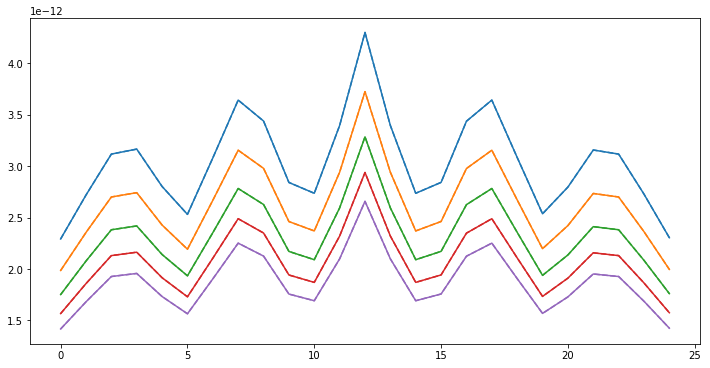

In [43]:
fg = plt.figure(figsize=(12,6))
ax1 = plt.gca()
print('*** local_inte: ', local_intensities_mgs.shape)
print('*** local_inte: ', local_intensities_mg.shape)
for k in [0, 20, 40, 60, 80]:
    #for j in range(0, 380, 20):
    #for j in range(0,len(local_intensities_mgs)):
        #ln, = ax1.plot(local_intensities_mg[k][j:j+20], ls='-')
    ln, = ax1.plot(local_intensities_mgs[k].T.ravel(), ls='-')
    #
    clr = ln.get_color()
    #        
    ax1.plot(local_intensities_mgr[k].ravel(), ls='--', color=clr)
    #
    #break
    

IndexError: index 5 is out of bounds for axis 0 with size 5

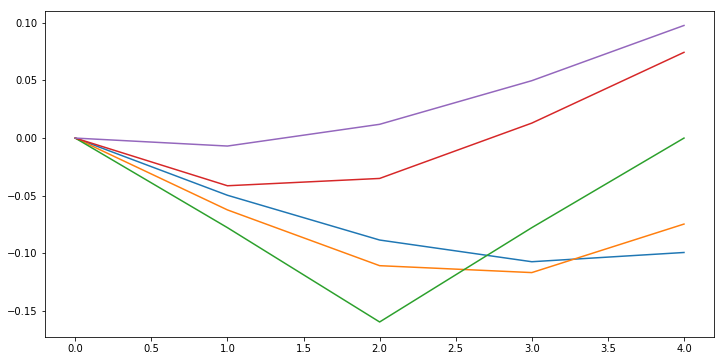

In [44]:
fg = plt.figure(figsize=(12,6))
ax1 = plt.gca()
for k in [0, 20, 40, 60, 80]:
    for j in range(local_intensities_mgr.shape[1]):
        ln, = ax1.plot((local_intensities_mgr[k][j]-local_intensities_mgs[k][j])/(local_intensities_mgr[k][j]+local_intensities_mgs[k][j]), ls='-')
        clr = ln.get_color()
    #ln, = ax1.plot( (local_intensities_mgr[k]-local_intensities_mgs[k])/
    #               (local_intensities_mgr[k]+local_intensities_mgs[k]),
    #               ls='-')
    #
        #ax1.plot(local_intensities_mg[k][j:j+20], ls='--', color=clr)
        #break
    #break
    

In [196]:
with h5py.File('my_h5.hdf5', 'w') as fout:
    ds1 = fout.create_dataset('ds1', (10, 100, 100), dtype='f')
    ds2 = fout.create_dataset('ds2', (20, 200, 200), dtype='d')
    dimensions = fout.create_group('dimensions')
    dim1 = dimensions.create_dataset('dim1', (10,),  dtype='f4')
    dim2 = dimensions.create_dataset('dim2', (100,), dtype='f8')
    dim3 = dimensions.create_dataset('dim3', (100,), dtype='f16')
    #
    # do we need to use dataset.write_direct() and dataset.read_direct() methods?
    # . is dataset[:]=vals or dataset[k:j]=vals[l:m] equivalent? Maybe not. read_/write_direct() 
    # . requires the numpy.array and/or hdf5 object to be c-contiguous (not chunked).
    #   my guess is that _direct() is faster, but les wieldy.
    #
    dim1[:] = numpy.linspace(0,5, len(dim1))
    dim2.write_direct(numpy.linspace(-115, 125, len(dim2)))
    dim3.write_direct(numpy.linspace(31., 36., len(dim3)))
    #
    ds2.write_direct(numpy.random.random(ds2.shape))
#

    #


with h5py.File('my_h5.hdf5', 'r') as fin:
    print('keys: ', fin.keys())
    #
    fin.visit(print)
    def f(ky):
        if hasattr(fin[ky], 'dtype'):
            print('** {}: {}'.format(ky, fin[ky].dtype) ) 
    #
    fin.visit(f)
    #
    print('dimn1: ', fin['dimensions']['dim1'][:])
#

keys:  <KeysViewHDF5 ['dimensions', 'ds1', 'ds2']>
dimensions
dimensions/dim1
dimensions/dim2
dimensions/dim3
ds1
ds2
** dimensions/dim1: float32
** dimensions/dim2: float64
** dimensions/dim3: float128
** ds1: float32
** ds2: float64
dimn1:  [0.        0.5555556 1.1111112 1.6666666 2.2222223 2.7777777 3.3333333
 3.8888888 4.4444447 5.       ]


In [164]:
from globalETAS import Earthquake
deg2km = 111.11
#
import h5py
#
# TODO:
# maybe use numpy.digitize(x,bins) --> indices of bins into which x belong.??
# so set up the bins, then create indices with .digitize(), assign values
# with indices. I think this should be at least comparably as fast as requiring
# and assigning contiguous blocks. One trick will be to be to index on the dinmensionsm,
# so we don't have to evaluate the full 2/3D space (we can evaluate the 2/3 1D dimension
# . arrays).
#
# can we subset an HDF5... i guess file class?
def create_netas_hdf5(fname_out='my_hdf5.h5', times=None, times_to=None, lats=None, lons=None):
    # NOTE: lats, lons, and time arrays might be better called "dimensions".
    # . they are the unique values.
    # TODO: handle incomplete or improperly formatted times_to inputs.
    times_to = numpy.atleast_1d(times_to)
    with h5py.File(fname_out, 'w') as fout:
        netas = fout.create_dataset("nETAS", (len(times), len(lons), len(lats)), dtype='d')
        #lats  = fout.create_dataset('lats', (len(lats),), dtype='>f8') 
        #
        # do we want to embrace the NetCDF 'dimension' convention?
        # dimensions = fout.create_group('dimensions')
        # lats = dimensions.create_dataset('lats', (len(lats),), data=lats) 
        lats     = fout.create_dataset('lats', (len(lats),), data=lats) 
        lons     = fout.create_dataset('lons', (len(lons),), data=lons)
        times    = fout.create_dataset('times', (len(times),), times=times)
        times_to = fout.create_dataset('times_to', (len(times_to),), data=times_to)
        #
    #
    return None
    
#
class NETAS_collector():
    # the whole enchillada:
    # 1) we'll take a catalog as an input for now.
    # 2) Either from inputs or catalog, determine spatial and temporal extents.
    # 3) Define binning translator, j,k,l = f(lon), g(lat), h(t)
    # 4) create or reference an HDF5, NetCDF, or other container object to aggregate the data
    # 5) Loop through catalog:
    # .   1) Compute a NETAS_block().netas_block() for each event
    # .   2) Bin-Align returned data; aggregate into HDF5-like object
    def __init__(self, catalog=None, h5_file=None,
                 lons=None, lats=None,
                 lon_min=-180., lon_max=180., lat_min=-90., lat_max=90., d_lon=.1, d_lat=.1,
                 lon_bin_phase=0., lat_bin_phase=0.
                 times=None, times_to=None
                 ):
        # TODO: sort out some default behaviors, like inferring time, lat, lon extents from catalog,
        # . fetching a catalog if lats, lons, times specified, etc...
        # . for now, think modular, and let it break if need be.
        #
        if not os.path.isfile(h5_file): 
            # NOTE: this is not a comprehensive way to build lon, lat domains in a periodic
            # . domain (on a sphere). We probably just need to be specific -- ie, pass the 
            # . lons, lats sequendcs directly.
            if lats is None:
                lats = numpy.arange(min_lat, max_lat+d_lat, d_lat)
            if lons is None:
                lons = numpy.arange(min_lon, max_lon+d_lon, d_lon)
            #
            #
            no_return = create_netas_hdf5(fname_out=h5_file, times=times, times_to=times_to,
                                          lats=lats,
                                          lons=lons)
            #
        #
        # if an h5 file was passed, we'd pull lons, lats from its dimension collection.
    #
    def lon_to_bin(self, lon):
        # return [[lon_bin_index, lon_bin_val], ...]
        #
        # int((self.lon - delta_lon + lon_phase)/d_lon)*d_lon
        #lon_binned = lon
        pass
    
#

** -200.0: 160.0, *(160.0, 42.0)
** -190.0: 170.0, *(170.0, 42.0)
** -180.0: -180.0, *(-180.0, 42.0)
** -150.0: -150.0, *(-150.0, 42.0)
** 0.0: 0.0, *(0.0, 42.0)
** 150.0: 150.0, *(150.0, 42.0)
** 180.0: -180.0, *(-180.0, 42.0)
** 190.0: -170.0, *(-170.0, 42.0)
** 200.0: -160.0, *(-160.0, 42.0)
** **  [ 160.  170. -180. -150.    0.  150. -180. -170. -160.]


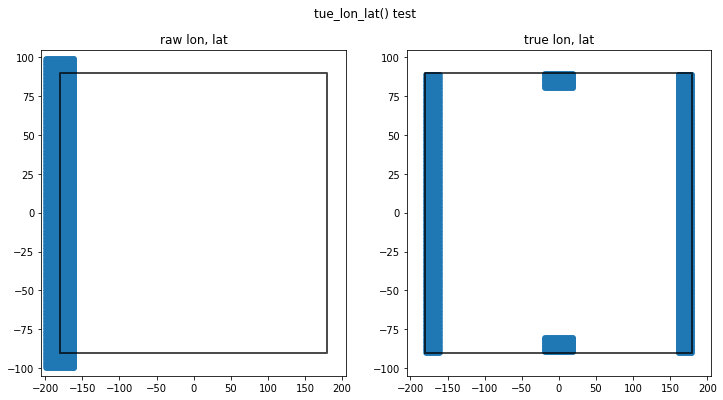

In [257]:
class NETAS_block(Earthquake):
    # Note: it might make more sense to include an Earthquke(), or list of Earthquake()s rather than subclassing.
    #. For batched MPP, for example, it would be possible to pre-construct a complete array of sites for multiple
    #  inputs (Earthquake()s). On the other hand, that introduces some opportunity for memory mis-management, 
    #. mistakes, or requiring indexing (aka, you have earthquakes that are not close together, maybe non-
    #. contiguous lattice sites)...
    def __init__(self, times=None, times_to=None, spatial_intensity_threshold=1e-2, time_intensity_threshold=None, 
                 lon_phase=0., lat_phase=0., d_lon=.1, d_lat=.1,
                 *args, **kwargs):
        '''
        # @times: an iterable of times
        # @spatial_intensity_threshold: compute range by invertng spatial-omori; solve for 1/this.
        # @time_intensity_threshold: same, but for temporal distributionz. again, x_min ~ x0/this
        #
        # removing lon_0, lat_0. We'll map the min addresses (lon, lat) to indices in a parent/calling
        # . function or class. we will substitute these with phase offsets, which we'll usually set to zero.
        # .  note, these should lon_phase < d_lon, lat_phase < d_lat.
        ## @lon_0, lat_0 : zero-point for lon, lat bins, respectively.
        # @lon_phase, @lat_phase: phase to add to lon, lat bins, respectively.
        ## # parent array binning:
        #
        # TODO: what is the best parent binning convention? allow negative bins indices? Maybe we just
        #. leave that up to the parent object. I think that, by itself, negative index labels, centered
        #. on LL=[0,0] is most intuitive.
        # @d_lon, d_lat : lon, lat bin sizes, respectively
        #. bin indices are then j = int((lon - lon_0)/d_lon), k = int( (lat - lat_0)/d_lat)
        # 
        # parent __init__(): __init__(self, dict_or_recarray, transform_type='equal_area', transform_ratio_max=5.,
            ab_ratio_expon=.5, t_1=None, t_2=None)
        #
        '''
        #
        # initialize the Earthquake() part:
        super(NETAS_block, self).__init__(*args, **kwargs)
        #
        # handle intensity threshold inputs:
        # NOTE: None does not make sense with this object. if we want to do an unrestricted, fully connected
        # . nETAS, use a different gridding object (just pass the full lattice dims to all events).
        #if not spatial_intensity_threshold is None:
        spatial_intensity_threshold = min(spatial_intensity_threshold, 1./spatial_intensity_threshold)
        if not time_intensity_threshold is None:
            time_intensity_threshold = min(time_intensity_threshold, 1./time_intensity_threshold)
        #
        self.__dict__.update({key:val for key,val in locals().items() if not key in ('self', '__class__')})
        #
        # now, compute the spatial range and optionally the temporal range, or more specifically
        #   the lon, lat, time dimensions/indices. compute these as pairs: [[k_label, value], ...]
        #.  k_label: the index "label", or the index in a larger (global) lattice.
        #.  an we use their ordering for direct indexing.
        delta_lat = self.etas_range()/deg2km
        delta_lon = delta_lat*numpy.cos(self.lat*scipy.constants.degree)
        #
        # TODO: move this to a module level function?
        lat_min = int((self.lat - delta_lat + lat_phase)/d_lat)*d_lat
        lon_min = int((self.lon - delta_lon + lon_phase)/d_lon)*d_lon
        #
        #self.__dict__.update({'delta_lat':delta_lat, 'delta_lon':delta_lon, 'lat_min':lat_min, 'lon_min':lon_min})
        self.__dict__.update({key:val for key,val in locals().items() if not key in ('self', '__class__')})
        #
        # TODO: write these as functions to save memory? They will typically be called once
        #. and then return a 2D array of intensities.
        #lats = numpy.arange(lat_min, lat_min + 2*delta_lat, d_lat)
        #lats_index_labels = ((lats-lat_0)/d_lat).astype(int)
        #
        #lons = numpy.arange(lon_min, lon_min + 2*delta_lon, d_lon)
        #lons_index_labels = ((lons-lon_0)/d_lon).astype(int)
        #
    #
    @property
    def lats(self):
        # TODO: are we de-modularizing too much here? I think maybe we just compute lats and lons
        #. at this level. we leave the binning to the calling function. 
        #lats = numpy.arange(self.lat_min, self.lat_min + 2*self.delta_lat, self.d_lat)
        #lats_index_labels = ((self.lats-self.lat_0)/self.d_lat).astype(int)
        #
        #return numpy.core.records.fromarrays([lats_index_labels, lats], dtype=[('index', '>i8'), ('lat', '>f8')])
        return numpy.arange(self.lat_min, self.lat_min + 2*self.delta_lat, self.d_lat)
    #                           
    @property
    def lons(self):
        #lons = numpy.arange(self.lon_min, self.lon_min + 2*self.delta_lon, self.d_lon)
        #lons_index_labels = ((self.lons - self.lon_0)/self.d_lon).astype(int)
        #
        #return numpy.core.records.fromarrays([lons_index_labels, lons], dtype=[('index', '>i8'), ('lat', '>f8')])
        return numpy.arange(self.lon_min, self.lon_min + 2*self.delta_lon, self.d_lon)
    #
    def etas_range(self, spatial_intensity_threshold=None):
        spatial_intensity_threshold = spatial_intensity_threshold or self.spatial_intensity_threshold
        if spatial_intensity_threshold is None:
            return None
        #
        # TODO:
        # FIXME: 
        # what are the units for this formulation? i thought km, but...j
        # . this appears to actually be right, just a bit surprising how big r_0 is...
        # anyway, this may be wrong. or not useful, either untis or formula... or maybe just taht r_0 is 
        # . really big -- a lot bigger than rupture length (like 10x for an M7). We probably need to reevaluate
        #   our solutions for r_0. This could be an interesting ML exercise -- to ue the r_0 formulation that
        # . optimized predictability (or something).
        return self.r_0*(spatial_intensity_threshold**(-1./self.q) - 1.)
    #
    def etas_temporal_range(self, time_intensity_threshold=None):
        time_intensity_threshold = time_intensity_threshold or self.time_intensity_threshold
        if time_intensity_threshold is None:
            return None
        #
        return self.t_0*(time_intensity_threshold**(-1./self.p) - 1.)
    #
    def lons_lats_mgrid(self):
        return numpy.meshgrid(true_lon(self.lons), true_lat(self.lats) )
    #
    def nETAS_block(self):
        #
        lons, lats = true_lon_lat(*numpy.meshgrid(self.lons, self.lats ) )
        #
        #print('*** DEBUG: shapes:: {}, {}'.format(lons.shape, lats.shape) )
        #print('*** DEBUG: shapes_true:: {}, {}'.format(true_lon(lons).shape, true_lat(lats).shape) )
        #
        return self.local_intensities(ts=self.times, ts_to=self.times_to, lons=lons, lats=lats )
    #
def true_lon(x):
    # lon can be corrected independently...
    return (x+180.)%360. - 180.
#
def true_lon_lat(X,Y):
    # lat introduces lon corrections...
    #
    # first latitude:
    Y_prime = (Y+90.)%360.
    m = Y_prime//180.
    #print('** DEBUG: ', m)
    #
    #print('*** ', m*180.)
    #print('*** ', (-1.)**m)
    #print('*** ', Y_prime%180.)
    #
    #Y_prime = m*180. + ((-1.)**m)*(Y_prime%180. )- 90.
    #
    #X_prime = ((X+180.) +m*180.)%360 - 180.
    #
    #return X_prime, Y_prime
    return ((X+180.) +m*180.)%360 - 180., m*180. + ((-1.)**m)*(Y_prime%180. )- 90.
#
#
# Some true_lon_lat() tests:
for x in (-200., -190., -180., -150., 0., 150., 180., 190., 200.):
    print('** {}: {}, *{}'.format(x, true_lon(x), true_lon_lat(x, 42.)))

print('** ', numpy.arange(10)%3)
print('** ', true_lon_lat(-170., 100))
print('** ', true_lon_lat(-190., 100))
print('** ', true_lon_lat(-190., 80))
print('** ', true_lon_lat(-190., -80))
print('** ', true_lon_lat(-190., -100))
    
# a graphical test of true_lon_lat:
X_test, Y_test = numpy.meshgrid(numpy.arange(-200., -160, .5), numpy.arange(-100., 100., .5))
X_prime, Y_prime = true_lon_lat(X_test, Y_test)
#
fg = plt.figure(figsize=(12, 6))
ax1 = plt.subplot('121')
ax2 = plt.subplot('122')
#
plt.suptitle('tue_lon_lat() test')
ax1.set_title('raw lon, lat')
ax2.set_title('true lon, lat')
#
ax1.plot(X_test.ravel(), Y_test.ravel(), ls='', marker='.')
ax2.plot(X_prime.ravel(), Y_prime.ravel(), ls='', marker='.')
for ax in (ax1, ax2):    
    #
    ax.set_xlim(-205, 205)
    ax.set_ylim(-105, 105)
    #
    ax.plot([-180., 180., 180., -180., -180.], [-90., -90., 90., 90., -90.], 
            zorder=11, color='k', lw=2., alpha=.7)
    
print('** ** ', true_lon(numpy.array([-200., -190., -180., -150., 0., 150., 180., 190., 200.])))

In [262]:
def x_to_bin(x, x_phase=0., d_x=0.1, x_0=0.):
    # return index and value, [[lat_index, lat_val], ...]
    # . note re: index, we might be computing the 
    # lat_min = int((self.lat - delta_lat + lat_phase)/d_lat)*d_lat
    #
    #xs = float(int((x+x_phase)/d_x)*d_x)
    #
    # xs*d_x gives us the raw (global) indexing. we might want a smaller
    # . subset. Nominally there are couple of ways to do this -- subtract x_0
    # . before or after we do the binning. Compute speed is an issue, but
    # . this will be performed on the 1D dimensions, so it should be a minor
    # . issue. note the int() operator is transcendental, so might not comply
    # . with standard commutative and associative rules.
    #
    #ks = int((x+x_phase)/d_x) - int((x_0+x_phase)/d_x)
    #
    return numpy.array([(int((x+x_phase)/d_x) - int((x_0+x_phase)/d_x), float(int((x+x_phase)/d_x)*d_x) )]).T
#
X = numpy.random.random(size=(10))*5. + 37.1
print('** ', [[x, k, xx] for x, (k, xx) in zip(X, x_to_bin(X)) ])

TypeError: only size-1 arrays can be converted to Python scalars

In [264]:
(numpy.random.random(10)).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [229]:
ts = numpy.linspace(eq.event_date_float, eq.event_date_float+10., 10)

block = NETAS_block(times=ts, **eq.input_parameters, spatial_intensity_threshold=.1)
block_netas = block.nETAS_block()
print('block.shape: ', block_netas.shape )

print('** ', block.r_0, block.etas_range() )
print('** dist: {}, {}'.format(eq.spherical_dist(to_lon_lat=[eq.lon+1, eq.lat]),
                               eq.spherical_dist(to_lon_lat=[eq.lon, eq.lat+1])))
#
#
print('** at 30Lr: {}'.format((eq.local_intensities(ts=[eq.event_date_float], 
                            lons=[eq.lon], lats=[eq.lat+(30.*eq.L_r)/deg2km])/
                               eq.local_intensities(ts=[eq.event_date_float], 
                            lons=[eq.lon], lats=[eq.lat])
                              )[0][0] ) )
#
my_lons = numpy.ones(200)*eq.lon
my_lats = numpy.linspace(eq.lat, eq.lat+5., 200)
#li_line = eq.local_intensities(ts=numpy.array([mpd.date2num(dtm.datetime.now(pytz.timezone('UTC')))]),
li_line = eq.local_intensities(ts=[eq.event_date_float], lons=my_lons, lats=my_lats)

block.shape:  (10, 838, 680)
**  1277.0384715765306 4650.449038187024
** dist: 90.32094641321325, 111.3188450214511
** at 30Lr: 0.08747032204542209


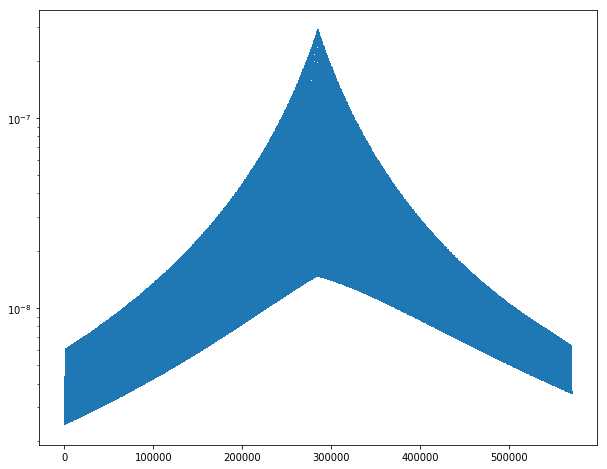

In [230]:
fg = plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_yscale('log')
ax.plot(block_netas[0].ravel(), ls='', marker=',')

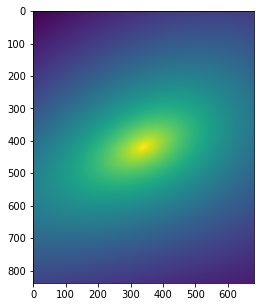

In [231]:
for k,rw in enumerate(block_netas):
    fg =plt.figure(figsize=(6,5))
    ax = plt.gca()
    #
    ax.imshow(numpy.log(block_netas[6,:,:]))
    break

In [232]:
#
print('** ', eq.L_r)
print('** ', (30.*eq.L_r)/deg2km)
print('** ', 61.65*30/111.1)
#
print('** ** ', eq.local_intensities(ts=[eq.event_date_float], 
                            lons=[eq.lon], lats=[eq.lat+(30.*eq.L_r)/deg2km] ) /li_line[0][0] )
#
my_lns = numpy.linspace(0,5,10)
my_lts = numpy.linspace(0,5,20)
#
lngs, ltgs = numpy.meshgrid(my_lns, my_lts)
#
print('** ', lngs.shape, ltgs.shape )

**  61.65950018614819
**  16.648231532575338
**  16.647164716471647
** **  [[0.08747032]]
**  (20, 10) (20, 10)


***  (1, 200)


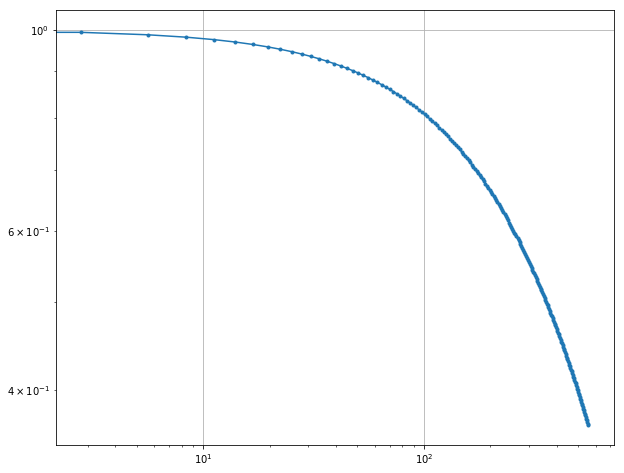

In [233]:
print('*** ', li_line.shape)
#print('** ', ((eq.chi*eq.r_0**eq.q)*(eq.tau*eq.t_0**eq.p)) )

fg = plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')
#
t0_norm = li_line[0][0]
#t0_norm = 1.0
ax1.plot(eq.spherical_dist(to_lon_lat=numpy.array([my_lons, my_lats])), 
         li_line[0,:]/t0_norm,
                     ls='-', marker='.')

In [234]:
XX, YY = block.lons_lats_mgrid()

In [235]:
print('*** ', XX.shape, YY.shape)
print('*** ', block.delta_lat, block.delta_lon)
print('*** ', block.etas_range() )
print('*** ', eq.mag)
#print('*** ', 100./deg2km)

***  (838, 680) (838, 680)
***  41.85445988828209 33.959666238280114
***  4650.449038187024
***  7.1


In [236]:
rates = block.nETAS_block()

In [237]:
print('*** ', eq.spherical_dist(to_lon_lat =([eq.lon+1., eq.lat+1.])) )

***  142.99075064998948


In [238]:
print('** ', scipy.constants.degree*360.)

A = numpy.random.random(20)*20
print(A)
print(A.astype(int) )

**  6.283185307179586
[17.44987819 11.2808127  12.29730712  4.16519353  7.78572417 18.1829848
  4.61080921 15.22309535  3.96486441  8.14286422 10.83543894 13.00443511
 10.18832595 14.76238779  2.18954612  4.78733241  5.13143118 12.17479123
 14.91089992 13.43851587]
[17 11 12  4  7 18  4 15  3  8 10 13 10 14  2  4  5 12 14 13]


In [239]:
print(numpy.arange(5,10,.1))

[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7
 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5
 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


In [240]:
def f_lon(x):
    return (x+180)%360. - 180

for x in [-190., -120., -115., 120., 115., 190.]:
    print('** {} : {}'.format(x, f_lon(x)))
#


** -190.0 : 170.0
** -120.0 : -120.0
** -115.0 : -115.0
** 120.0 : 120.0
** 115.0 : 115.0
** 190.0 : -170.0


In [241]:
#########
# we're getting a small difference in local_intensities() values for lon,lat submitted as a 1D (with labels)
#. array, aka [lon0, lon0, lon0,...],  [lat0, lat1, lat2, ...] vs 2D arrays (lon and lat are each 2D arrays,
#. indexed by array position).
#
# the difference is on order 10**-17 for values of 10**-12 (so, one part in 10**5). this could be a float/double
#. type thing, or it could be something else...
# they seem to equal; it is possible the type difference becomes expressed somnewhere else, or maybe it's a lat/lon
# conversion issue, which would explain the symmetrical shape of the error.
#
lon_dim = numpy.linspace(eq.lon-2., eq.lon+2., 5)
lat_dim  = numpy.linspace(eq.lat-2., eq.lat+2., 5)
#
lons_mg, lats_mg = numpy.meshgrid(lon_dim, lat_dim)
#LL_i = numpy.array(list(itertools.product(lon_dim, lat_dim)))
LL_i = numpy.array([[b,a] for a,b in itertools.product(lat_dim, lon_dim)])
LL_r = numpy.array([lons_mg.ravel(), lats_mg.ravel()]).T
#


print('lon: ', lon_dim)
print('lat: ', lat_dim)
#
print('lons_mg: ', lons_mg)
print('lats_mg: ', lats_mg)
#
#
print('LL_i: ', LL_i)
print('LL_r: ', LL_r)
#
print('** ?? LL_i == LL_r? {}'.format(LL_i == LL_r))
#
# this all appears to check out so far. what about spherical distances?

#Rs_sph_i = eq.spherical_dist(to_lon_lat = numpy.array([lons, lats]))
Rs_sph_i = eq.spherical_dist(to_lon_lat = LL_i.T )
Rs_sph_r = eq.spherical_dist(to_lon_lat = LL_r.T )
Rs_sph_r2 = eq.spherical_dist(to_lon_lat = numpy.meshgrid(lon_dim, lat_dim))



lon:  [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
lat:  [33.7695 34.7695 35.7695 36.7695 37.7695]
lons_mg:  [[-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]]
lats_mg:  [[33.7695 33.7695 33.7695 33.7695 33.7695]
 [34.7695 34.7695 34.7695 34.7695 34.7695]
 [35.7695 35.7695 35.7695 35.7695 35.7695]
 [36.7695 36.7695 36.7695 36.7695 36.7695]
 [37.7695 37.7695 37.7695 37.7695 37.7695]]
LL_i:  [[-119.5993333   33.7695   ]
 [-118.5993333   33.7695   ]
 [-117.5993333   33.7695   ]
 [-116.5993333   33.7695   ]
 [-115.5993333   33.7695   ]
 [-119.5993333   34.7695   ]
 [-118.5993333   34.7695   ]
 [-117.5993333   34.7695   ]
 [-116.5993333   34.7695   ]
 [-115.5993333   34.7695   ]
 [-11

In [242]:
print('** ii', Rs_sph_i)
print('** r1', Rs_sph_r)
print('** r2', Rs_sph_r2.T)
print('**\n**:: ', (Rs_sph_i == Rs_sph_r).all() )
print('** :: ', (Rs_sph_r.ravel() == (Rs_sph_r2.T).ravel()).all() )

** ii [288.10684737 240.68080891 222.63769004 240.68080891 288.10684737
 213.14203774 143.70631776 111.31884502 143.70631776 213.14203774
 180.63954247  90.32094641   0.          90.32094641 180.63954247
 211.20820178 142.99075065 111.31884502 142.99075065 211.20820178
 285.24429538 239.82691633 222.63769004 239.82691633 285.24429538]
** r1 [288.10684737 240.68080891 222.63769004 240.68080891 288.10684737
 213.14203774 143.70631776 111.31884502 143.70631776 213.14203774
 180.63954247  90.32094641   0.          90.32094641 180.63954247
 211.20820178 142.99075065 111.31884502 142.99075065 211.20820178
 285.24429538 239.82691633 222.63769004 239.82691633 285.24429538]
** r2 [[288.10684737 213.14203774 180.63954247 211.20820178 285.24429538]
 [240.68080891 143.70631776  90.32094641 142.99075065 239.82691633]
 [222.63769004 111.31884502   0.         111.31884502 222.63769004]
 [240.68080891 143.70631776  90.32094641 142.99075065 239.82691633]
 [288.10684737 213.14203774 180.63954247 211.208

In [243]:
# Still chasing down what looks like a (relatively) benign numerical error, 
# . somehow related to re-shaping an array to/from 1D from/to 2D.
#
# related, but separately too, let's confirm how numpy.outer() aligns. We know that .outer(a,b)
# . ravels the output, so .outer([p,], [n,m]) -> [p, n*m] (or something like that). let's be
# . sure it's re-shaping the way we think it is...
#
# how does .outer() align?
#
xx = numpy.arange(24).reshape((6,4))
tt = numpy.arange(1.,10.)
print('** xx: ', xx)
print('** tt: ', tt)
#
xx_tt = numpy.outer(xx,tt)
#
print('*** shape(xx_tt): ', numpy.shape(xx_tt))
print('*** ', xx_tt)
#
# so this shape is row, column, time. utterly non-intuitive to me, but we can still
# . use the inherited indexing to slice it. aka, if we want the time-series for a given grid elementm,
# . X[j,k,:]
print('*** reshape shape: ', numpy.reshape(xx_tt, (*xx.shape, *tt.shape)).shape)
print('*** reshape:', numpy.reshape(xx_tt, (*xx.shape, *tt.shape)))

** xx:  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
** tt:  [1. 2. 3. 4. 5. 6. 7. 8. 9.]
*** shape(xx_tt):  (24, 9)
***  [[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   3.   4.   5.   6.   7.   8.   9.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90.]
 [ 11.  22.  33.  44.  55.  66.  77.  88.  99.]
 [ 12.  24.  36.  48.  60.  72.  84.  96. 108.]
 [ 13.  26.  39.  52.  65.  78.  91. 104. 117.]
 [ 14.  28.  42.  56.  70.  84.  98. 112. 126.]
 [ 15.  30.  45.  60.  75.  90. 105. 120. 135.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144.]
 [ 17.  34.  51.

In [244]:
tt_xx = numpy.outer(tt,xx)
#
# this is, i assumne, not more correct than the previous orientation, but IMHO
# . much more intuitive. again, if we want the time series of agiven grid element,
# . X[:,j,k]
print('** shape(tt_xx): ', numpy.shape(tt_xx))
print('** ', tt_xx)
print('*** ', tt_xx.reshape(*tt.shape, *xx.shape) )

** shape(tt_xx):  (9, 24)
**  [[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.]
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
   28.  30.  32.  34.  36.  38.  40.  42.  44.  46.]
 [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
   42.  45.  48.  51.  54.  57.  60.  63.  66.  69.]
 [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
   56.  60.  64.  68.  72.  76.  80.  84.  88.  92.]
 [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
   70.  75.  80.  85.  90.  95. 100. 105. 110. 115.]
 [  0.   6.  12.  18.  24.  30.  36.  42.  48.  54.  60.  66.  72.  78.
   84.  90.  96. 102. 108. 114. 120. 126. 132. 138.]
 [  0.   7.  14.  21.  28.  35.  42.  49.  56.  63.  70.  77.  84.  91.
   98. 105. 112. 119. 126. 133. 140. 147. 154. 161.]
 [  0.   8.  16.  24.  32.  40.  48.  56.  64.  72.  80.  88.  96. 104.
  112. 120. 128. 136. 1

In [245]:
# accessing the sequence with swapped axes:
#
xx_tt_s = numpy.reshape(xx_tt, (*xx.shape, *tt.shape))
tt_xx_s = numpy.reshape(tt_xx, (*tt.shape, *xx.shape))

print('** ', xx_tt_s[1,2,:])
print('** ', tt_xx_s[:,1,2])

**  [ 6. 12. 18. 24. 30. 36. 42. 48. 54.]
**  [ 6. 12. 18. 24. 30. 36. 42. 48. 54.]


In [246]:
print(xx_tt.shape)
print(tt_xx.shape)

(24, 9)
(9, 24)


li_shape[0]: (10, 50, 50)
li_shape[1]: (10, 2500)
li_shape[2]: (10, 2500)
(itr==mgr).all() False
******


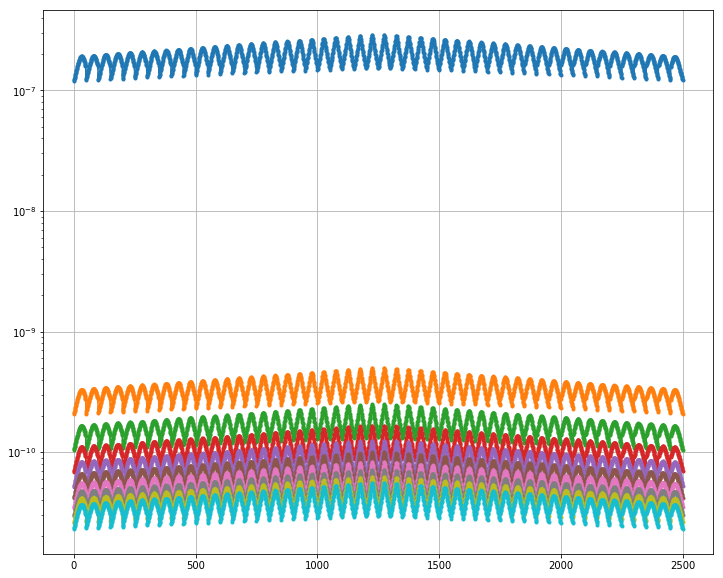

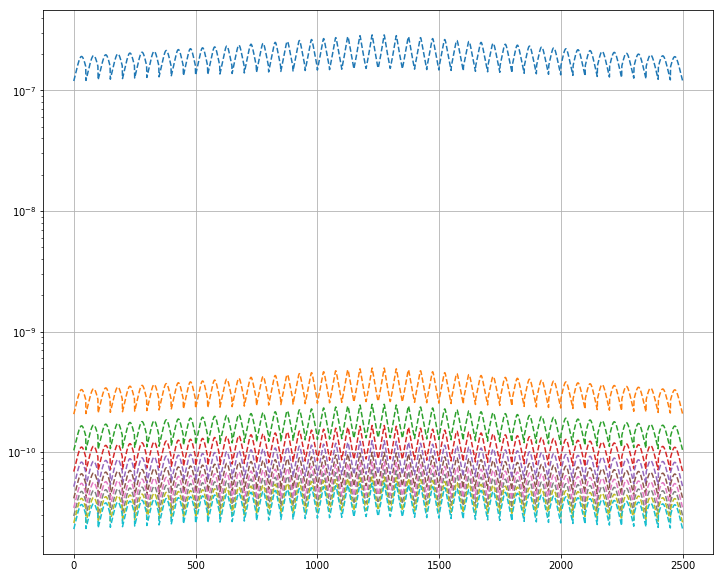

In [247]:
# create three versions of lons, lats:
# 1) itertools
# 2) meshgrid
# 3) meshgrid, then raveled to look like itertools
#
lon_dim = numpy.linspace(eq.lon-3., eq.lon+3., 50)
lat_dim  = numpy.linspace(eq.lat-3., eq.lat+3., 50)
#
# note: we might want to transpose these. meshgrid() and itertools.product() basically 
#. create transposed versinos of the same data product.
#
lons_mg, lats_mg = numpy.meshgrid(lon_dim, lat_dim)
LL_i = numpy.array([[b,a] for a,b in itertools.product(lat_dim, lon_dim)])
LL_r = numpy.array([lons_mg.ravel(), lats_mg.ravel()]).T

#
# NOTE: I think this is the right way to compare 2D and ravel()ed data.
# TODO: figure these out...
local_intensities_mgs = block.local_intensities(ts=ts, lons=lons_mg, lats=lats_mg)
local_intensities_mgr = eq.local_intensities(ts=ts, lons=lons_mg.T.ravel(), lats=lats_mg.T.ravel())
# this might all be wrong (axes not alligned correctly) now...
local_intensities_itr = eq.local_intensities(ts=ts, lons=LL_i[:,0], lats=LL_i[:,1])

for k, li in enumerate([local_intensities_mgs, local_intensities_mgr, local_intensities_itr]):
    print('li_shape[{}]: {}'.format(k, li.shape))
#print('li_shapes: ', local_intensities.shape)
#print('** ', local_intensities[0][0:20])
#
#print('mgs==mgr: ', local_intensities_mgs.reshape(local_intensities_mgr.shape)==local_intensities_mgr)
#print('mgs==itr: ',  (local_intensities_mgs==local_intensities_itr.reshape(-1, 5,5)))
#
# these basically are equal, with a nan issue in the middle.
#print('itr==mgr: ', (local_intensities_itr==local_intensities_mgr))
print('(itr==mgr).all()', (local_intensities_itr==local_intensities_mgr).all())
print('******')
#
# local_intensities_mgs.reshape(local_intensities_mgr.shape)==local_intensities_mgr
#
fg = plt.figure(figsize=(12,10))
ax = plt.gca()
ax.grid()
ax.set_yscale('log')
#
for k, (rw1, rw2) in enumerate(zip(local_intensities_mgs, local_intensities_mgr) ):
    #if k%10!=0:
    #    continue
    #if k==0: continue
    #
    ln, = ax.plot(rw1.T.ravel(), ls='-')
    clr = ln.get_color()
    ax.plot(rw2.ravel(), ls='--', color=clr, marker='.')
    #

# #
fg = plt.figure(figsize=(12,10))
ax = plt.gca()
ax.grid()
ax.set_yscale('log')
#
for k, (rw1, rw2) in enumerate(zip(local_intensities_mgs, local_intensities_mgr) ):
    #if k%10!=0:
    #    continue
    #
    ln, = ax.plot(rw1.reshape(rw2.shape)[0], ls='-')
    clr = ln.get_color()
    ax.plot(rw2.ravel(), ls='--', color=clr)
    #

# #

In [248]:
print('** ', local_intensities_mgs.shape)

**  (10, 50, 50)


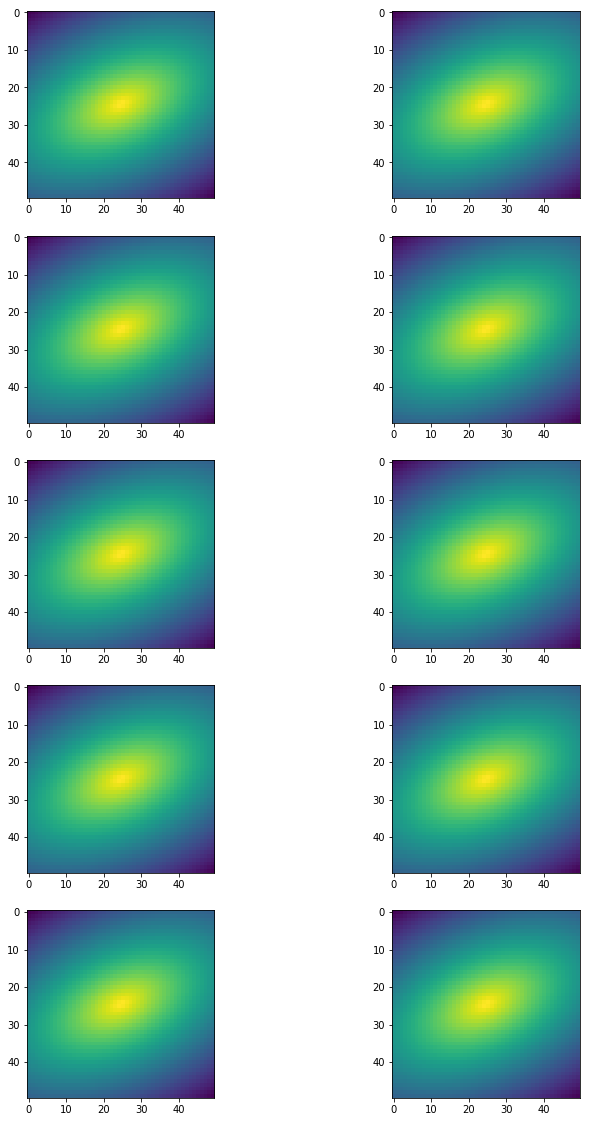

In [249]:
fg = plt.figure(figsize=(12,20))
ax = plt.gca()
#
for k,rw in enumerate(local_intensities_mgs):
    ax = plt.subplot(5,2, k+1)
    
    ax.imshow(numpy.log(rw))

In [250]:
block2 = NETAS_block(times=ts, **eq.input_parameters, spatial_intensity_threshold=.5, d_lat=.25, d_lon=.25)
print('** ', len(block2.lats))
print('** ', block2.lats)
print('** ', block2.lat, block2.lon)

**  55
**  [29.   29.25 29.5  29.75 30.   30.25 30.5  30.75 31.   31.25 31.5  31.75
 32.   32.25 32.5  32.75 33.   33.25 33.5  33.75 34.   34.25 34.5  34.75
 35.   35.25 35.5  35.75 36.   36.25 36.5  36.75 37.   37.25 37.5  37.75
 38.   38.25 38.5  38.75 39.   39.25 39.5  39.75 40.   40.25 40.5  40.75
 41.   41.25 41.5  41.75 42.   42.25 42.5 ]
**  35.7695 -117.5993333


In [251]:
# lons, lats = numpy.meshgrid(true_lon(self.lons), true_lat(self.lats) )
#         #
#         #print('*** DEBUG: shapes:: {}, {}'.format(lons.shape, lats.shape) )
#         #print('*** DEBUG: shapes_true:: {}, {}'.format(true_lon(lons).shape, true_lat(lats).shape) )
#         #
#         return self.local_intensities(ts=self.times, ts_to=self.times_to, lons=lons, lats=lats )

my_lns, my_lts = numpy.meshgrid(true_lon(block.lons), true_lat(block.lats))
zs = block2.local_intensities(ts=block2.times, lons=my_lns, lats=my_lts)

#zs = block.nETAS_block()

In [252]:
print('** ', zs.shape)
print('** ', block2.lats.shape, block2.lons.shape)
X,Y = numpy.meshgrid(block2.lons, block2.lats)
zs = block2.local_intensities(ts=block2.times, lons=X, lats=Y)

**  (10, 838, 680)
**  (55,) (44,)


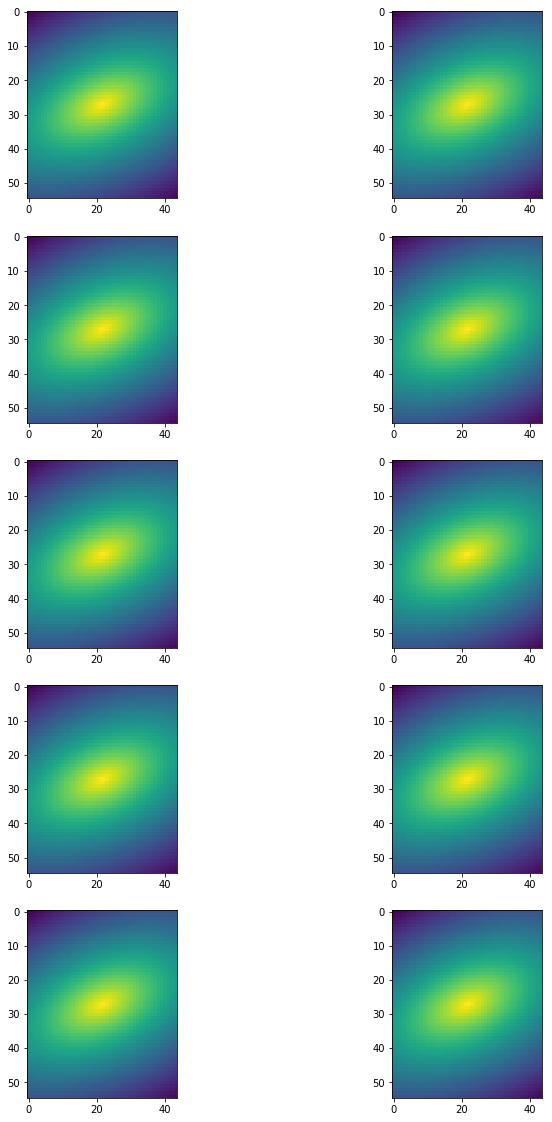

In [253]:
fg = plt.figure(figsize=(12,20))
ax = plt.gca()
#
for k,rw in enumerate(zs):
    ax = plt.subplot(5,2, k+1)
    
    ax.imshow(numpy.log(rw))

[[0.82330398 0.86722249 0.43983138 0.68748179 0.58105177]
 [0.02169679 0.44647095 0.94915056 0.13152339 0.04221432]
 [0.68122759 0.84040147 0.55856066 0.32302008 0.21793635]
 [0.18506189 0.05253943 0.48411122 0.45933688 0.70126653]
 [0.67846497 0.51998714 0.79972148 0.1127593  0.55295337]]
**  [[ True  True False  True  True]
 [False False  True False False]
 [ True  True  True False False]
 [False False False False  True]
 [ True  True  True False  True]]
**  [[0.         0.         0.43983138 0.         0.        ]
 [0.02169679 0.44647095 0.         0.13152339 0.04221432]
 [0.         0.         0.         0.32302008 0.21793635]
 [0.18506189 0.05253943 0.48411122 0.45933688 0.        ]
 [0.         0.         0.         0.1127593  0.        ]]
